# Notebook 2.0
## Data Analytics on Australian Football League ('AFL')

The aim of this Notebook is to:
1) Explore the data available for AFL
2) Experiement to see if any machine learning can be used to predict the performance of players or teams.

We will be using the CRISP-DM methodology loosely.
1) Business Understanding
2) Data Understanding
3) Data Preparation
4) Modeling
5) Evaluation
6) Deployment

The sources of the data are 
https://afltables.com/afl/afl_index.html

# Virtual Environemnt

Virtual Environment has not beeen set up yet. 
read up on

It is encouraged to create a virtual environment. This has been done through `virtualenv env`

This needs to be reinstated.

In [107]:
#First we install the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi
%matplotlib inline

afl_2010 = pd.read_csv('Source_Data/2010_stats.txt')
afl_2011 = pd.read_csv('Source_Data/2011_stats.txt')
afl_2012 = pd.read_csv('Source_Data/2012_stats.txt')
afl_2013 = pd.read_csv('Source_Data/2013_stats.txt')
afl_2014 = pd.read_csv('Source_Data/2014_stats.txt')
afl_2015 = pd.read_csv('Source_Data/2015_stats.txt')
afl_2016 = pd.read_csv('Source_Data/2016_stats.txt')
afl_2017 = pd.read_csv('Source_Data/2017_stats.txt')
afl_2018 = pd.read_csv('Source_Data/2018_stats.txt')
afl_2019 = pd.read_csv('Source_Data/2019_stats.txt')
afl_2020 = pd.read_csv('Source_Data/AFL_2020.csv')
#afl_total = pd.read_csv('Source_Data/2010_stats.txt')

In [108]:
afl_2010['Year']=2010
afl_2011['Year']=2011
afl_2012['Year']=2012
afl_2013['Year']=2013
afl_2014['Year']=2014
afl_2015['Year']=2015
afl_2016['Year']=2016
afl_2017['Year']=2017
afl_2018['Year']=2018
afl_2019['Year']=2019
afl_2020['Year']=2020

In [109]:
afl_total=pd.DataFrame()
afl_total=afl_total.append(afl_2010)
afl_total=afl_total.append(afl_2011)
afl_total=afl_total.append(afl_2012)
afl_total=afl_total.append(afl_2013)
afl_total=afl_total.append(afl_2014)
afl_total=afl_total.append(afl_2015)
afl_total=afl_total.append(afl_2016)
afl_total=afl_total.append(afl_2017)
afl_total=afl_total.append(afl_2018)
afl_total=afl_total.append(afl_2019)
afl_total=afl_total.append(afl_2020)

In [110]:
afl_total.shape

(96756, 29)

In [111]:
afl_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96756 entries, 0 to 7127
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Player                   96756 non-null  object
 1   ID                       96756 non-null  int64 
 2   Team                     96756 non-null  object
 3   Opponent                 96756 non-null  object
 4   Round                    96756 non-null  object
 5   Kicks                    96756 non-null  int64 
 6   Marks                    96756 non-null  int64 
 7   Hand Balls               96756 non-null  int64 
 8   Disp                     96756 non-null  int64 
 9   Goals                    96756 non-null  int64 
 10  Behinds                  96756 non-null  int64 
 11  Hit Outs                 96756 non-null  int64 
 12  Tackles                  96756 non-null  int64 
 13  Rebounds                 96756 non-null  int64 
 14  Inside 50                96756 non-null

This data is presented as each player's performance stats in a given round, against each team.




As can be see from the results above there are 29 fields or attributes. Here we will go through and define these. This will help in furthering our understanding of the game. This will be done through looking on line for an understanding.

- Field Number - Field Name - Description
    - 0 - Player Name - This should be a string, with the value of the name of the player in the format first name last name.
    - 1 - ID - This is an integer that uniquely indentifies the record.
    - 2 - Team - This is a two character string representing the team the player plays for.
    - 3 - Opponent - This is a two character string representingt he opposition the player was playing against.
    - 4 - Round - An integer representing the round of the season inwhich the game between Team and Opponent took place.
    - 5 - Kicks - This is a disposal of the ball by foot. This is an integer representing the total kicks completed by the player in the game.
    - 6 - Marks - This is a clean catch of the ball after it was kicked by another player (either same team or not) before it has touched the ground or been touched by another player and after it has travelled a minimum of 15 metres. This is an integer and represents the total marks the player made in the game.
    - 7 - Hand Balls - This is the number of times the player passed the ball or disposed of the ball using his hand.
    - 8 - Disp - Short for Disposal, represents the number of times the player successfully passed the ball to a team mate, either through a kick or a hand pass.
    - 9 - Goals - The number of goals scored by the player in the match. Each goal is worth 6 points.
    - 10 - Behinds - The number of times the player socres a behind. Each behind is worth 1 point.
    - 11 - Hit Outs - The number of times the player knocks the ball out of a ruck contest following a stoppage with clear control, regardless of which side wins the following contest at ground level.
    - 12 - Tackles - The number of times a player uses physical contact to prevent an opponent in possession of the ball from getting an effective disposal.
    - 13 - Rebounds - An integer representing the number of times a player has won the ball back and moved it from defence into the midfield.
    - 14 - Inside 50 - An integer representing the number of times the player ran or passed the ball inside the 50 metre arc. A measure for midfielders that do not score many but set them up for team mates.
    - 15 - Clearances - An integer representing the number of times a ball was cleared out of a stoppage situation. 
    - 16 - Clangers - An integer representing the number of unforced errors including, kicking or hand passing directly to an opponent, dropping an uncontested mark or conceding a freekick. 
    - 17 - Frees For - An interger representing the number of frees given for the player. 
    - 18 - Frees Against - An integer representing the number of frees given against a player.
    - 19 - Brownlow - Points awarded at the end of the game by the Umpires to the best and fairest on the ground. In the week of the Grand Final the player with the most points ovet the season wins the Brownlow Medal.
    - 20 - Unconcested possession - An integer representing the number of times the player won possession without contesting for it.
    - 21 - Contested possessions - An integer representing the number of times a player won possession of the ball after contesting for it. Includes hardball gets, looseball gets, contested marks, free kicks won in a contest, and contested knock-ons.
    - 22 - Contested marks - An integer representing the number of times a player won possession of the ball in mark by contending for the ball see definition of a mark above. 
    - 23 - Marks inside 50 - An integer representing the number of times a player won a mark inside the opponents 50 metre area. See defition of Mark above.
    - 24 - One percenters - An integer representing the number of times the player carried out a defensive act such as a block, bump, shepherd, smother or chase. 
    - 25 - Bounces - An integer that represents the number of times an umpire bounced the ball back in play. This does not make sense to be put here. Might be the number of times the player bounced the ball while running. Dentoes players who like to carry the ball forward?
    - 26 - Goal Assists - An integer representing the number of passes (kick or hand ball) that lead to a goal.
    - 27 - % Time played - A number representing the amount of game time the player seen.
    - 28 - Year - A number representing the year the match took place.

These definitions were taken from Wikipedia. Please let me know if you agree or disagree. https://en.wikipedia.org/wiki/Glossary_of_Australian_rules_football
5) Rebounds, Inside 50, One percenters, Marks Inside 50

In [112]:
pd.options.display.max_columns = None

In [113]:
afl_total.describe()

,ID,Kicks,Marks,Hand Balls,Disp,Goals,Behinds,Hit Outs,Tackles,Rebounds,Inside 50,Clearances,Clangers,Frees For,Frees Against,Brownlow,Uncontested Possessions,Contested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,% Time Played,Year
count,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000,96756.000000
mean,9775.710468,9.331194,4.019513,7.125749,16.456943,0.567355,0.408595,1.765916,2.950897,1.577401,2.300932,1.673509,2.214777,0.845612,0.843369,0.130162,6.514934,9.846862,0.500847,0.517022,2.181591,0.366313,0.381950,81.807226,2014.965439
std,4082.862958,4.557550,2.534457,4.313416,7.141475,0.972444,0.732628,6.516277,2.282946,1.787546,1.916975,2.181208,1.636074,0.994719,0.977792,0.535512,3.764879,5.307746,0.861411,0.981904,2.324969,0.922896,0.672228,12.941043,3.085974
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2010.000000
25%,11542.000000,6.000000,2.000000,4.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,78.000000,2012.000000
50%,11834.000000,9.000000,4.000000,6.000000,16.000000,0.000000,0.000000,0.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,6.000000,9.000000,0.000000,0.000000,2.000000,0.000000,0.000000,84.000000,2015.000000
75%,12167.000000,12.000000,6.000000,10.000000,21.000000,1.000000,1.000000,0.000000,4.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.000000,0.000000,9.000000,13.000000,1.000000,1.000000,3.000000,0.000000,1.000000,89.000000,2018.000000
max,12848.000000,36.000000,22.000000,35.000000,54.000000,13.000000,7.000000,80.000000,19.000000,16.000000,16.000000,19.000000,13.000000,9.000000,9.000000,3.000000,32.000000,40.000000,9.000000,13.000000,25.000000,18.000000,10.000000,100.000000,2020.000000


In [114]:
afl_total.head()

,Player,ID,Team,Opponent,Round,Kicks,Marks,Hand Balls,Disp,Goals,Behinds,Hit Outs,Tackles,Rebounds,Inside 50,Clearances,Clangers,Frees For,Frees Against,Brownlow,Uncontested Possessions,Contested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,% Time Played,Year
0,Daniel Connors,11604,RI,CA,1,14,3,10,24,0,0,0,1,6,2,2,4,2,0,0,8,15,0,0,1,0,0,69,2010
1,Trent Cotchin,11666,RI,CA,1,11,6,8,19,0,0,0,1,2,2,3,3,0,2,0,8,10,1,0,0,1,0,77,2010
2,Ben Cousins,1051,RI,CA,1,13,1,6,19,1,0,0,1,4,1,2,3,1,0,0,9,10,0,0,0,0,1,69,2010
3,Brett Deledio,4068,RI,CA,1,12,5,9,21,1,0,0,6,3,4,3,4,1,2,0,7,14,0,0,0,0,0,89,2010
4,Shane Edwards,11557,RI,CA,1,7,2,10,17,0,0,0,2,2,1,4,2,1,0,0,7,10,0,0,5,0,0,84,2010


In [115]:
afl_total.groupby(['Team']).sum()

,ID,Kicks,Marks,Hand Balls,Disp,Goals,Behinds,Hit Outs,Tackles,Rebounds,Inside 50,Clearances,Clangers,Frees For,Frees Against,Brownlow,Uncontested Possessions,Contested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,% Time Played,Year
Team,,,,,,,,,,,,,,,,,,,,,,,,,
AD,52859058,51601,22111,38737,90338,3276,2356,10032,15387,8494,12856,9194,11676,4493,4292,706,36072,53737,2842,2892,11410,1832,2207,442803,10904608
BL,53836573,48031,20998,35611,83642,2802,2071,9451,15238,8850,11619,8824,11959,4561,4753,551,32896,49983,2311,2454,12015,1254,1867,433721,10683376
CA,51426987,50310,21702,34395,84705,2833,2120,9484,15632,8357,11887,9061,11633,4525,4400,647,33863,50033,2654,2754,11702,2419,1897,435592,10726936
CW,54089209,54777,23619,41808,96585,3353,2392,9655,17525,8602,13589,9353,12312,4683,4258,874,38147,57917,3000,3148,12620,2496,2283,460773,11347644
ES,52270574,50468,22640,38582,89050,2919,2173,8758,15537,8618,12248,8613,11771,4343,4447,611,34404,54230,2741,2693,11340,1920,1960,433744,10683002
FR,52477934,50048,21941,38602,88650,2885,2050,10770,16064,8455,11842,9069,11855,4471,4576,747,35550,52869,2863,2617,11134,1657,1940,446327,10992762
GC,51871421,42145,17281,31562,73707,2250,1821,7798,13425,7998,9991,7915,10991,3812,3903,420,30215,42903,2044,1982,10706,1948,1502,386961,9532820
GE,51714153,54012,24311,43082,97094,3681,2519,9633,17613,8590,13984,9408,12777,4963,5046,918,38576,58417,3316,3497,12255,1563,2568,469779,11569690
GW,50452959,42163,18118,31542,73705,2392,1769,7962,13124,7725,9865,7859,10507,3695,4025,532,28940,44345,1997,2048,9639,2000,1643,367171,9047786


In [116]:
#The follow cell will create a new column that will create a full length Name for both columns
#Team, Opponent and a new column Points.
# Team Name will take the two letter abbreviation from Team column and put in full name.
# Opponent Name will tke the two letter abbreviation from Opponent column  and put full name.
# Points will take the value in Goals multiply it by 6 and add in the Behinds. Giving the total points scored by the player in the game.

afl_total['Points']= (afl_total['Goals']*6)+ afl_total['Behinds']

In [117]:
condition = [
    (afl_total['Team'] == 'AD'),
    (afl_total['Team'] == 'BL'),
    (afl_total['Team'] == 'CA'),
    (afl_total['Team'] == 'CW'),
    (afl_total['Team'] == 'ES'),
    (afl_total['Team'] == 'FR'),
    (afl_total['Team'] == 'GC'),
    (afl_total['Team'] == 'GE'),
    (afl_total['Team'] == 'GW'),
    (afl_total['Team'] == 'HW'),
    (afl_total['Team'] == 'ME'),
    (afl_total['Team'] == 'NM'),
    (afl_total['Team'] == 'PA'),
    (afl_total['Team'] == 'RI'),
    (afl_total['Team'] == 'SK'),
    (afl_total['Team'] == 'SY'),
    (afl_total['Team'] == 'WB'),
    (afl_total['Team'] == 'WC'),
]
values = ['Adelaide Crows','Brisbane Lions','Carlton','Collingwood','Essendon','Freemantle','Gold Coast Suns',
         'Geelong Cats','Greater Western Sydney','Hawthorn','Melbourne','North Melbourne','Port Adeliade',
         'Richmond','St Kilda','Sydney Swans','Western Bulldogs','West Coast Eagles']

afl_total['Team Name']=np.select(condition,values)

afl_total.head()


,Player,ID,Team,Opponent,Round,Kicks,Marks,Hand Balls,Disp,Goals,Behinds,Hit Outs,Tackles,Rebounds,Inside 50,Clearances,Clangers,Frees For,Frees Against,Brownlow,Uncontested Possessions,Contested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,% Time Played,Year,Points,Team Name
0,Daniel Connors,11604,RI,CA,1,14,3,10,24,0,0,0,1,6,2,2,4,2,0,0,8,15,0,0,1,0,0,69,2010,0,Richmond
1,Trent Cotchin,11666,RI,CA,1,11,6,8,19,0,0,0,1,2,2,3,3,0,2,0,8,10,1,0,0,1,0,77,2010,0,Richmond
2,Ben Cousins,1051,RI,CA,1,13,1,6,19,1,0,0,1,4,1,2,3,1,0,0,9,10,0,0,0,0,1,69,2010,6,Richmond
3,Brett Deledio,4068,RI,CA,1,12,5,9,21,1,0,0,6,3,4,3,4,1,2,0,7,14,0,0,0,0,0,89,2010,6,Richmond
4,Shane Edwards,11557,RI,CA,1,7,2,10,17,0,0,0,2,2,1,4,2,1,0,0,7,10,0,0,5,0,0,84,2010,0,Richmond


In [118]:
condition = [
    (afl_total['Opponent'] == 'AD'),
    (afl_total['Opponent'] == 'BL'),
    (afl_total['Opponent'] == 'CA'),
    (afl_total['Opponent'] == 'CW'),
    (afl_total['Opponent'] == 'ES'),
    (afl_total['Opponent'] == 'FR'),
    (afl_total['Opponent'] == 'GC'),
    (afl_total['Opponent'] == 'GE'),
    (afl_total['Opponent'] == 'GW'),
    (afl_total['Opponent'] == 'HW'),
    (afl_total['Opponent'] == 'ME'),
    (afl_total['Opponent'] == 'NM'),
    (afl_total['Opponent'] == 'PA'),
    (afl_total['Opponent'] == 'RI'),
    (afl_total['Opponent'] == 'SK'),
    (afl_total['Opponent'] == 'SY'),
    (afl_total['Opponent'] == 'WB'),
    (afl_total['Opponent'] == 'WC'),
]
values = ['Adelaide Crows','Brisbane Lions','Carlton','Collingwood','Essendon','Freemantle','Gold Coast Suns',
         'Geelong Cats','Greater Western Sydney','Hawthorn','Melbourne','North Melbourne','Port Adeliade',
         'Richmond','St Kilda','Sydney Swans','Western Bulldogs','West Coast Eagles']

afl_total['Opponent Name']=np.select(condition,values)



In [119]:
condition = [
    (afl_total['Opponent'] == 'AD'),
    (afl_total['Opponent'] == 'BL'),
    (afl_total['Opponent'] == 'CA'),
    (afl_total['Opponent'] == 'CW'),
    (afl_total['Opponent'] == 'ES'),
    (afl_total['Opponent'] == 'FR'),
    (afl_total['Opponent'] == 'GC'),
    (afl_total['Opponent'] == 'GE'),
    (afl_total['Opponent'] == 'GW'),
    (afl_total['Opponent'] == 'HW'),
    (afl_total['Opponent'] == 'ME'),
    (afl_total['Opponent'] == 'NM'),
    (afl_total['Opponent'] == 'PA'),
    (afl_total['Opponent'] == 'RI'),
    (afl_total['Opponent'] == 'SK'),
    (afl_total['Opponent'] == 'SY'),
    (afl_total['Opponent'] == 'WB'),
    (afl_total['Opponent'] == 'WC'),
]
values = ['Adelaide Crows','Brisbane Lions','Carlton','Collingwood','Essendon','Freemantle','Gold Coast Suns',
         'Geelong Cats','Greater Western Sydney','Hawthorn','Melbourne','North Melbourne','Port Adeliade',
         'Richmond','St Kilda','Sydney Swans','Western Bulldogs','West Coast Eagles']

afl_total['Opponent Name']=np.select(condition,values)

afl_total.head()

,Player,ID,Team,Opponent,Round,Kicks,Marks,Hand Balls,Disp,Goals,Behinds,Hit Outs,Tackles,Rebounds,Inside 50,Clearances,Clangers,Frees For,Frees Against,Brownlow,Uncontested Possessions,Contested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,% Time Played,Year,Points,Team Name,Opponent Name
0,Daniel Connors,11604,RI,CA,1,14,3,10,24,0,0,0,1,6,2,2,4,2,0,0,8,15,0,0,1,0,0,69,2010,0,Richmond,Carlton
1,Trent Cotchin,11666,RI,CA,1,11,6,8,19,0,0,0,1,2,2,3,3,0,2,0,8,10,1,0,0,1,0,77,2010,0,Richmond,Carlton
2,Ben Cousins,1051,RI,CA,1,13,1,6,19,1,0,0,1,4,1,2,3,1,0,0,9,10,0,0,0,0,1,69,2010,6,Richmond,Carlton
3,Brett Deledio,4068,RI,CA,1,12,5,9,21,1,0,0,6,3,4,3,4,1,2,0,7,14,0,0,0,0,0,89,2010,6,Richmond,Carlton
4,Shane Edwards,11557,RI,CA,1,7,2,10,17,0,0,0,2,2,1,4,2,1,0,0,7,10,0,0,5,0,0,84,2010,0,Richmond,Carlton


In [120]:
afl_total.groupby('Team Name',as_index=False,sort=True)['Goals','Behinds','Points','Disp'].sum()

,Team Name,Goals,Behinds,Points,Disp
0,Adelaide Crows,3276,2356,22012,90338
1,Brisbane Lions,2802,2071,18883,83642
2,Carlton,2833,2120,19118,84705
3,Collingwood,3353,2392,22510,96585
4,Essendon,2919,2173,19687,89050
5,Freemantle,2885,2050,19360,88650
6,Geelong Cats,3681,2519,24605,97094
7,Gold Coast Suns,2250,1821,15321,73707
8,Greater Western Sydney,2392,1769,16121,73705
9,Hawthorn,3695,2447,24617,96411


In [121]:
chart_for_total = afl_total.groupby('Team',as_index=False)['Goals','Behinds','Disp','Kicks','Marks','Hand Balls','Tackles'].sum()
chart_for_total = chart_for_total.sort_values(by=['Goals'])
#chart_for_2010 = chart_for_2010['Total_Points']=chart_for_2010['Goals']*6+chart_for_2010['Behinds']
chart_for_total

,Team,Goals,Behinds,Disp,Kicks,Marks,Hand Balls,Tackles
6,GC,2250,1821,73707,42145,17281,31562,13425
8,GW,2392,1769,73705,42163,18118,31542,13124
10,ME,2741,2020,85661,47230,20275,38431,15759
1,BL,2802,2071,83642,48031,20998,35611,15238
2,CA,2833,2120,84705,50310,21702,34395,15632
14,SK,2860,2212,89102,50204,22824,38898,15685
5,FR,2885,2050,88650,50048,21941,38602,16064
4,ES,2919,2173,89050,50468,22640,38582,15537
16,WB,2999,2202,92639,50275,20993,42364,15986
12,PA,3052,2229,88000,50022,20622,37978,16510


<function matplotlib.pyplot.show(close=None, block=None)>

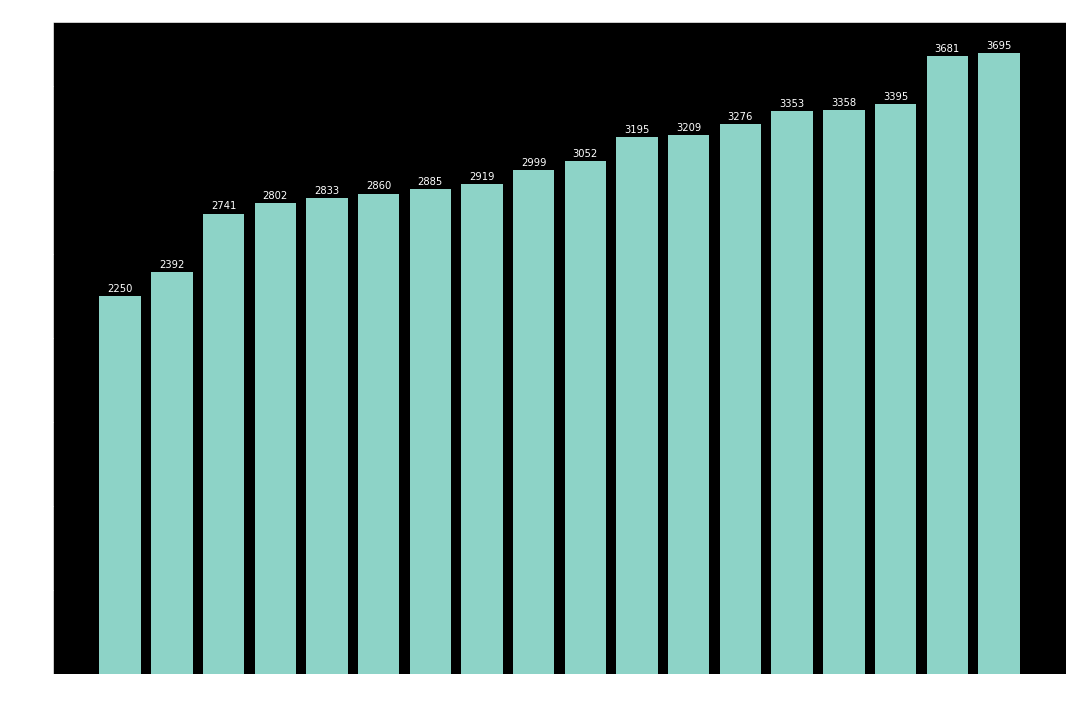

In [122]:
fig =plt.figure(figsize=(15,10))
ax = fig.add_subplot()
ax.set_title("Goals per team 2010 to 2020")
rects1=ax.bar(x=chart_for_total['Team'],height=chart_for_total['Goals'])
ax.set_xlabel("Team")
ax.set_ylabel("Goals Scored")
### Great method used to add data labels to the bar chart.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
fig.tight_layout()
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

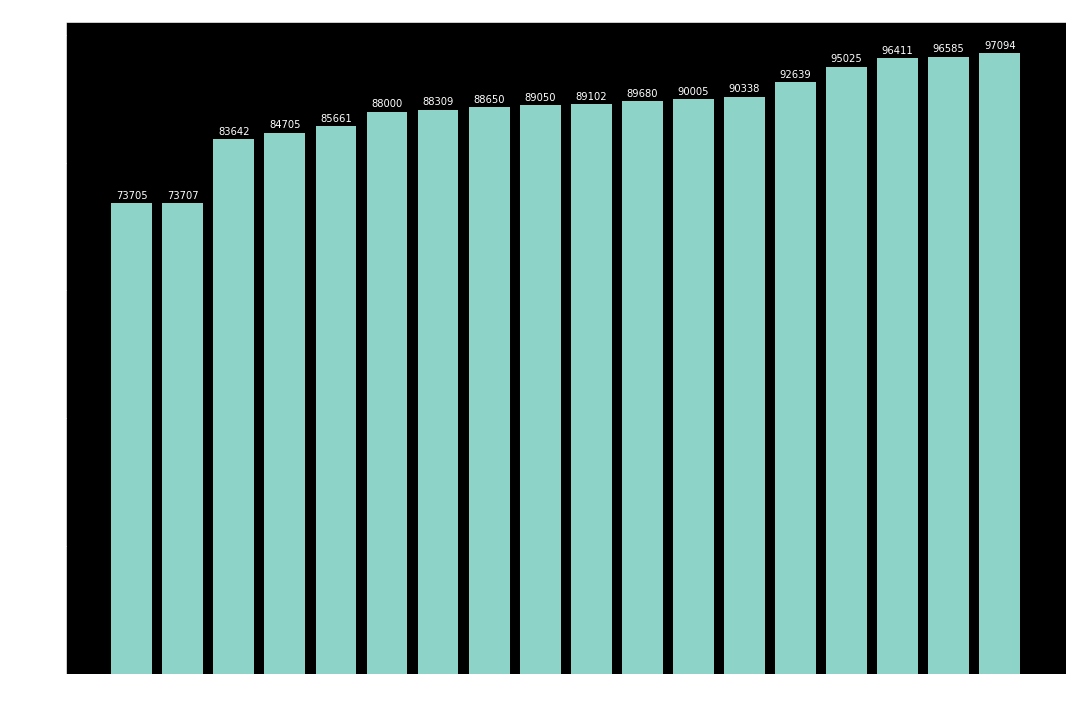

In [123]:
chart_for_total = chart_for_total.sort_values(by=['Disp'])
fig =plt.figure(figsize=(15,10))
ax = fig.add_subplot()
ax.set_title("Disposals per team 2010 to 2020")
rects1=ax.bar(x=chart_for_total['Team'],height=chart_for_total['Disp'])
ax.set_xlabel("Team")
ax.set_ylabel("Disposals")
### Great method used to add data labels to the bar chart.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
fig.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

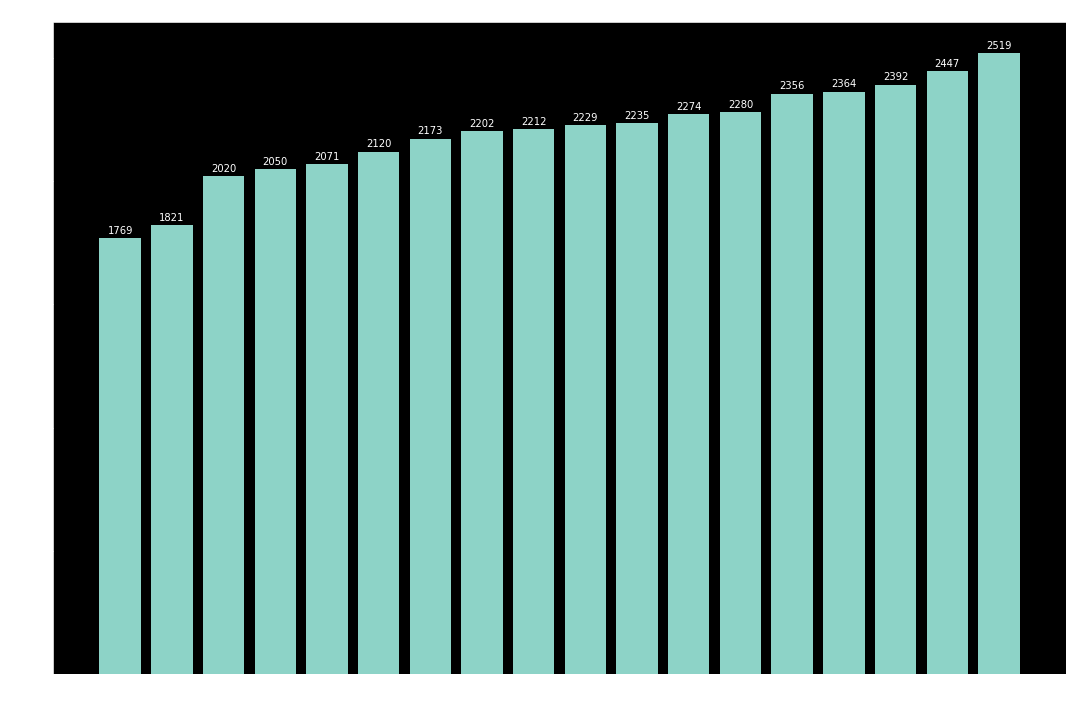

In [124]:
chart_for_total = chart_for_total.sort_values(by=['Behinds'])
fig =plt.figure(figsize=(15,10))
ax = fig.add_subplot()
ax.set_title("Behinds per team 2010 to 2020")
rects1=ax.bar(x=chart_for_total['Team'],height=chart_for_total['Behinds'])
ax.set_xlabel("Team")
ax.set_ylabel("Behinds")
### Great method used to add data labels to the bar chart.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
fig.tight_layout()
plt.show

In [125]:
afl_total.sort_values(by=['Goals'],ascending=False)

,Player,ID,Team,Opponent,Round,Kicks,Marks,Hand Balls,Disp,Goals,Behinds,Hit Outs,Tackles,Rebounds,Inside 50,Clearances,Clangers,Frees For,Frees Against,Brownlow,Uncontested Possessions,Contested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,% Time Played,Year,Points,Team Name,Opponent Name
3655,Lance Franklin,4065,HW,NM,10,22,11,1,23,13,4,0,6,0,4,0,4,3,2,3,9,14,4,9,2,0,1,93,2012,82,Hawthorn,North Melbourne
5419,Mark LeCras,4114,WC,ES,16,19,12,3,22,12,2,0,1,0,1,3,3,2,1,3,9,13,4,11,0,0,0,89,2010,74,West Coast Eagles,Essendon
2958,Josh Kennedy,4169,WC,GW,8,14,11,3,17,11,0,0,3,0,2,0,0,1,0,3,3,14,0,8,2,0,1,95,2014,66,West Coast Eagles,Greater Western Sydney
3363,Jack Riewoldt,11576,RI,GW,10,17,12,0,17,11,2,0,0,0,0,1,1,1,0,3,5,12,3,12,0,1,1,95,2014,68,Richmond,Greater Western Sydney
2999,Josh Kennedy,4169,WC,WB,9,20,15,1,21,10,3,0,4,0,5,0,3,0,3,3,8,12,5,11,0,0,1,82,2011,63,West Coast Eagles,Western Bulldogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,Brad Sheppard,11843,WC,GC,13,10,3,6,16,0,0,0,5,4,1,1,0,0,0,0,3,13,0,0,1,2,1,79,2014,0,West Coast Eagles,Gold Coast Suns
4506,Will Schofield,11605,WC,GC,13,7,2,5,12,0,0,0,1,3,2,0,1,2,1,0,6,7,0,0,7,1,0,99,2014,0,West Coast Eagles,Gold Coast Suns
4505,Matt Rosa,4133,WC,GC,13,9,8,15,24,0,0,0,2,3,4,4,0,0,0,0,10,14,0,0,1,1,2,92,2014,0,West Coast Eagles,Gold Coast Suns
4504,Matt Priddis,4186,WC,GC,13,9,2,23,32,0,0,0,7,1,3,12,1,1,0,1,19,13,0,1,0,0,0,84,2014,0,West Coast Eagles,Gold Coast Suns


In [126]:
dustin_martin_df=afl_total[afl_total["Player"]=="Dustin Martin"]

In [127]:
dustin_martin_by_year = dustin_martin_df.groupby('Year' ,as_index=False)['Goals','Kicks'].sum()

<function matplotlib.pyplot.show(close=None, block=None)>

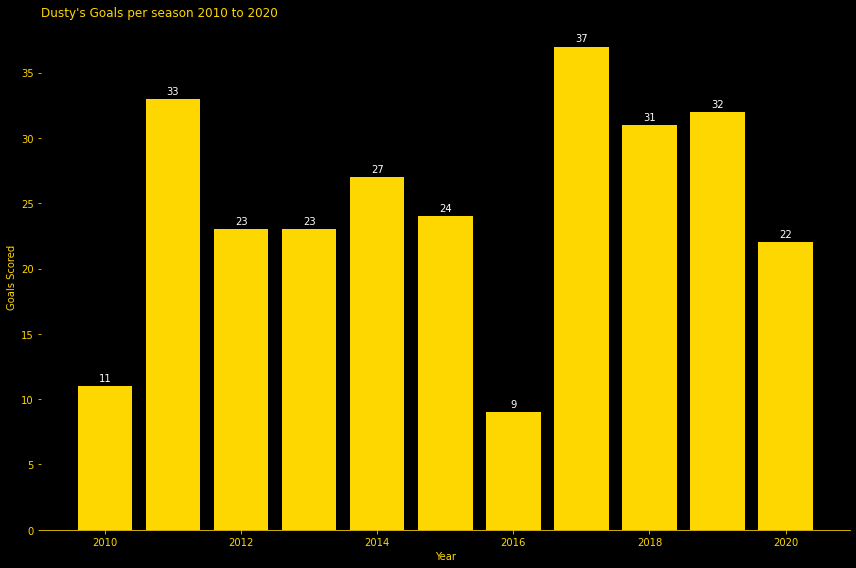

In [128]:

plt.style.use('dark_background')


fig =plt.figure(figsize=(12,8))
ax = fig.add_subplot()
#ax.text(color='Gold')
ax.set_title("Dusty's Goals per season 2010 to 2020",color="Gold",loc="left")
rects1=ax.bar(x=dustin_martin_by_year ['Year'],height=dustin_martin_by_year ['Goals'],color='Gold')
ax.set_xlabel("Year",color="Gold")
ax.set_ylabel("Goals Scored", color ="Gold")
right_side = ax.spines["right"]
right_side.set_visible(False)
left_side = ax.spines["left"]
left_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.spines['bottom'].set_color("Gold")
ax.tick_params(axis='x', colors="Gold")
ax.tick_params(axis='y', colors="Gold")

### Great method used to add data labels to the bar chart.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')#removed color='Gold'
autolabel(rects1)
fig.tight_layout()
plt.show

Created a radar plot on 6 attributes of 

1. Goals
2. Behinds
3. Kicks
4. Hand Balls
5. Disp
6. Marks


In [129]:
### Get Dustin Martin's averages from the dustin_martin_df data frame 
### First we set up a blank radar data frame and extract the fields we want to it,

dustin_martin_radar = dustin_martin_df.groupby("Player")["Goals","Kicks","Hand Balls","Disp","Marks"].mean()

patrick_dangerfield_df=afl_total[afl_total["Player"]=="Patrick Dangerfield"]
patrick_dangerfield_radar = patrick_dangerfield_df.groupby("Player")["Goals","Kicks","Hand Balls","Disp","Marks"].mean()
## How do I set the index to the player name?

In [130]:
dustin_martin_radar

,Goals,Kicks,Hand Balls,Disp,Marks
Player,,,,,
Dustin Martin,1.114754,15.741803,9.241803,24.983607,3.885246


In [131]:
patrick_dangerfield_radar

,Goals,Kicks,Hand Balls,Disp,Marks
Player,,,,,
Patrick Dangerfield,1.130081,13.341463,11.682927,25.02439,3.95935


In [132]:
from matplotlib.ticker import FuncFormatter, MaxNLocator

fig =plt.figure(figsize=(18,12))
attributes = list(dustin_martin_radar)
AttNo = len(attributes)
values = dustin_martin_radar.iloc[0].tolist()
values += values [:1]


<Figure size 1296x864 with 0 Axes>

In [133]:
angles = [n/float(AttNo)*2*pi for n in range(AttNo)]
angles += angles [:1]
angles[:1]


[0.0]

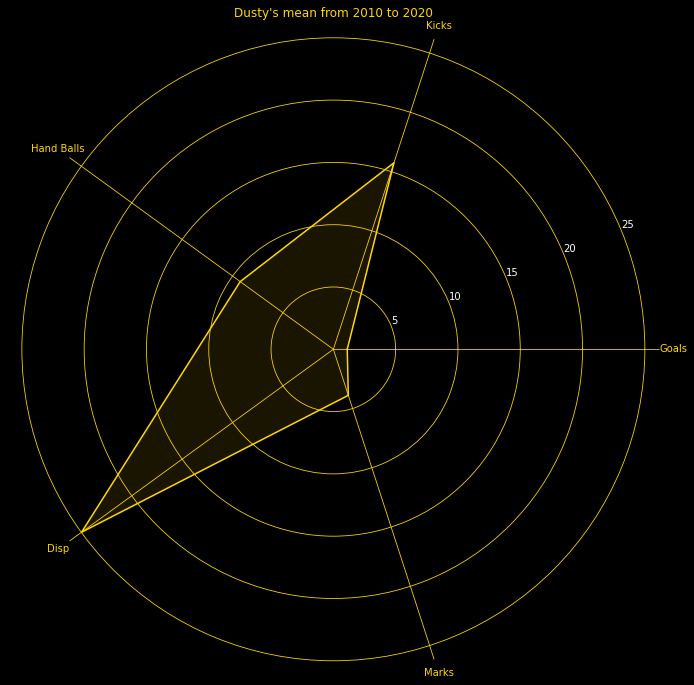

In [134]:
fig =plt.figure(figsize=(18,12))
ax=plt.subplot(111,polar=True)

plt.xticks(angles[:-1],attributes,color="Gold")

ax.plot(angles,values, color = "Gold")
ax.fill(angles, values,alpha=0.1, color="Gold")
ax.set_title("Dusty's mean from 2010 to 2020",color="Gold")
ax.xaxis.grid(True,color='Gold')
ax.yaxis.grid(True,color='Gold')

ax.spines["polar"].set_visible(False)


plt.show()

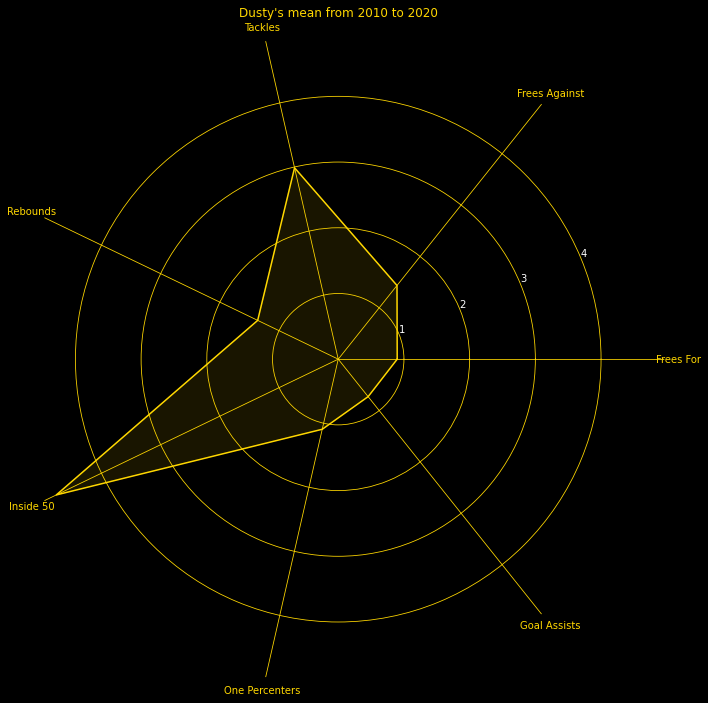

In [135]:
dustin_martin_second_radar = dustin_martin_df.groupby("Player")["Frees For", "Frees Against", "Tackles","Rebounds", "Inside 50", "One Percenters", "Goal Assists"].mean()

fig =plt.figure(figsize=(18,12))
attributes = list(dustin_martin_second_radar)
AttNo = len(attributes)
values = dustin_martin_second_radar.iloc[0].tolist()
values += values [:1]
angles = [n/float(AttNo)*2*pi for n in range(AttNo)]
angles += angles [:1]
angles[:1]
ax=plt.subplot(111,polar=True)

plt.xticks(angles[:-1],attributes,color="Gold")

ax.plot(angles,values, color = "Gold")
ax.fill(angles, values,alpha=0.1, color="Gold")
ax.set_title("Dusty's mean from 2010 to 2020",color="Gold")
ax.xaxis.grid(True,color='Gold')
ax.yaxis.grid(True,color='Gold')

ax.spines["polar"].set_visible(False)


plt.show()

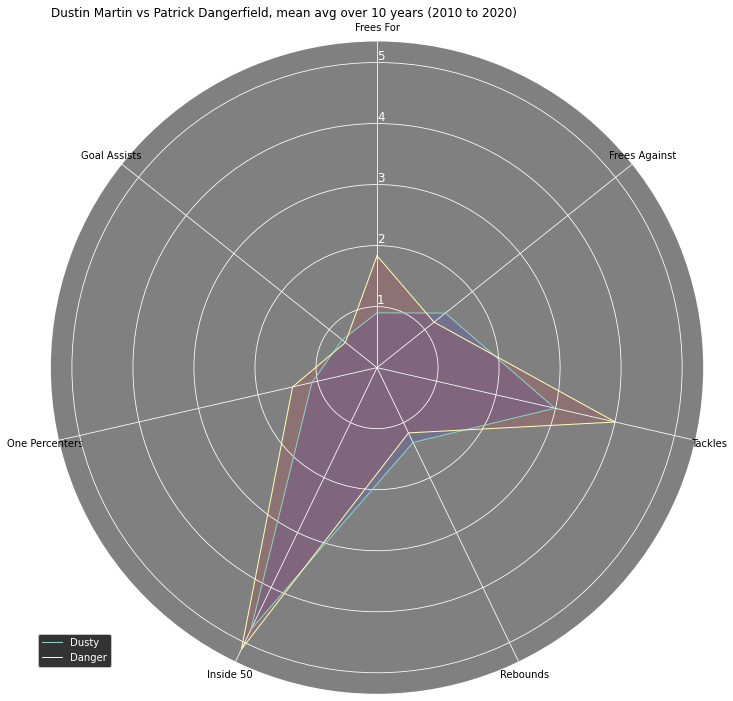

In [136]:
patrick_dangerfield_df=afl_total[afl_total["Player"]=="Patrick Dangerfield"]
patrick_dangerfield_radar = patrick_dangerfield_df.groupby("Player")["Goals","Kicks","Hand Balls","Disp","Marks"].mean()

patrick_dangerfield_second_radar = patrick_dangerfield_df.groupby("Player")["Frees For", "Frees Against", "Tackles","Rebounds", "Inside 50", "One Percenters", "Goal Assists"].mean()

radar_chart_2=pd.DataFrame()

radar_chart_2=radar_chart_2.append(dustin_martin_second_radar)
radar_chart_2=radar_chart_2.append(patrick_dangerfield_second_radar)


# ------- PART 1: Create background
fig =plt.figure(figsize=(18,12))
fig.set_facecolor("white")

#
# number of variable
categories=list(radar_chart_2)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color = 'Black')
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks( color='White', size=12)
#plt.ylim(0,40)


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
#values=radar_chart_2.loc[0].drop('group').values.flatten().tolist()
#values=np.array(radar_chart_2.iloc[0].values.flatten().tolist())
values=radar_chart_2.iloc[0].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Dusty")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
#values=radar_chart_2.loc[1].drop('group').values.flatten().tolist()
#values=np.array(radar_chart_2.iloc[1].values.flatten().tolist())
values = radar_chart_2.iloc[1].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Danger")
ax.fill(angles, values, 'r', alpha=0.1)
ax.spines["polar"].set_visible(False)
ax.set_facecolor("grey") 
ax.xaxis.grid(True,color='White')
ax.yaxis.grid(True,color='White')
ax.set_title("Dustin Martin vs Patrick Dangerfield, mean avg over 10 years (2010 to 2020)",color="Black",loc="left")

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))



In [137]:
radar_chart_2.iloc[0]

Frees For         0.897541
Frees Against     1.434426
Tackles           2.987705
Rebounds          1.360656
Inside 50         4.762295
One Percenters    1.094262
Goal Assists      0.729508
Name: Dustin Martin, dtype: float64

In [138]:
radar_chart_2.iloc[1]

Frees For         1.833333
Frees Against     1.195122
Tackles           4.004065
Rebounds          1.186992
Inside 50         5.121951
One Percenters    1.418699
Goal Assists      0.662602
Name: Patrick Dangerfield, dtype: float64

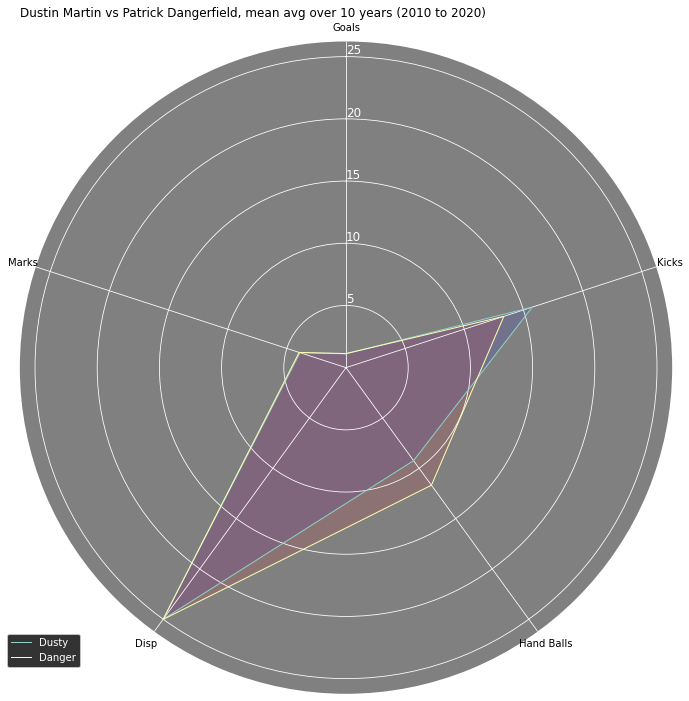

In [139]:
radar_chart_1=pd.DataFrame()

radar_chart_1=radar_chart_1.append(dustin_martin_radar)
radar_chart_1=radar_chart_1.append(patrick_dangerfield_radar)


# ------- PART 1: Create background
fig =plt.figure(figsize=(18,12))
fig.set_facecolor("white")

# number of variable
categories=list(radar_chart_1)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color = 'Black')
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks( color='White', size=12)
#plt.ylim(0,40)


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
#values=radar_chart_2.loc[0].drop('group').values.flatten().tolist()
values=radar_chart_1.iloc[0].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Dusty")
ax.fill(angles, values, 'b', alpha=0.1)



 
# Ind2
#values=radar_chart_2.loc[1].drop('group').values.flatten().tolist()
values_2=radar_chart_1.iloc[1].tolist()
values_2 += values_2[:1]
ax.plot(angles, values_2, linewidth=1, linestyle='solid', label="Danger")
ax.fill(angles, values_2, 'r', alpha=0.1)


ax.spines["polar"].set_visible(False)
ax.set_facecolor("grey") 
ax.xaxis.grid(True,color='White')
ax.yaxis.grid(True,color='White')
ax.set_title("Dustin Martin vs Patrick Dangerfield, mean avg over 10 years (2010 to 2020)",color="Black",loc="left")

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))



In [140]:
lachie_neale_df=afl_total[afl_total["Player"]=="Lachie Neale"]

In [141]:
lachie_neale_df

,Player,ID,Team,Opponent,Round,Kicks,Marks,Hand Balls,Disp,Goals,Behinds,Hit Outs,Tackles,Rebounds,Inside 50,Clearances,Clangers,Frees For,Frees Against,Brownlow,Uncontested Possessions,Contested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,% Time Played,Year,Points,Team Name,Opponent Name
1227,Lachie Neale,12055,FR,SK,4,0,1,7,7,0,0,0,0,0,0,0,0,0,0,0,4,3,0,0,0,0,0,29,2012,0,Freemantle,St Kilda
1669,Lachie Neale,12055,FR,CA,5,4,2,4,8,0,0,0,0,1,2,0,0,0,0,0,1,7,0,1,0,0,1,33,2012,0,Freemantle,Carlton
2151,Lachie Neale,12055,FR,GC,6,7,2,7,14,2,0,0,1,0,2,0,1,0,0,0,4,8,0,0,1,0,0,72,2012,12,Freemantle,Gold Coast Suns
2722,Lachie Neale,12055,FR,PA,7,7,2,3,10,0,1,0,4,0,3,0,1,1,1,0,3,7,0,0,1,0,0,63,2012,1,Freemantle,Port Adeliade
2897,Lachie Neale,12055,FR,HW,8,5,3,16,21,1,0,0,0,0,1,2,1,0,0,0,6,15,0,0,1,0,0,77,2012,6,Freemantle,Hawthorn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5910,Lachie Neale,12055,BL,GC,16,15,3,18,33,0,0,0,2,2,7,6,5,3,0,3,14,19,0,0,0,0,0,97,2020,0,Brisbane Lions,Gold Coast Suns
6285,Lachie Neale,12055,BL,SY,17,5,0,10,15,0,0,0,1,1,1,4,4,1,1,0,4,10,0,0,0,0,1,91,2020,0,Brisbane Lions,Sydney Swans
6527,Lachie Neale,12055,BL,CA,18,15,3,14,29,0,2,0,1,2,9,5,4,2,0,3,12,16,1,1,0,0,0,93,2020,2,Brisbane Lions,Carlton
6814,Lachie Neale,12055,BL,RI,QF,8,1,11,19,1,0,0,3,2,4,5,3,0,1,0,8,11,0,0,2,0,0,92,2020,6,Brisbane Lions,Richmond


In [142]:
lachie_neale_radar_1 = lachie_neale_df.groupby("Player")["Goals","Kicks","Hand Balls","Disp","Marks"].mean()
lachie_neale_radar_2 = lachie_neale_df.groupby("Player")["Frees For", "Frees Against", "Tackles","Rebounds", "Inside 50", "One Percenters", "Goal Assists"].mean()

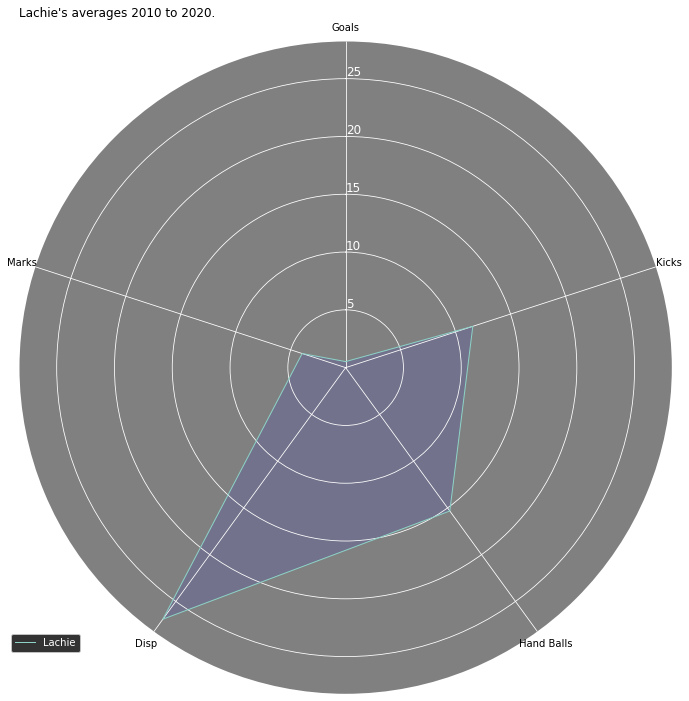

In [143]:

# ------- PART 1: Create background
fig =plt.figure(figsize=(18,12))
fig.set_facecolor("white")

# number of variable
categories=list(lachie_neale_radar_1)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color = 'Black')
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks( color='White', size=12)
#plt.ylim(0,40)


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
#values=radar_chart_2.loc[0].drop('group').values.flatten().tolist()
values=lachie_neale_radar_1.iloc[0].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Lachie")
ax.fill(angles, values, 'b', alpha=0.1)



 
# Ind2
#values=radar_chart_2.loc[1].drop('group').values.flatten().tolist()
#values_2=radar_chart_1.iloc[1].tolist()
#values_2 += values_2[:1]
#ax.plot(angles, values_2, linewidth=1, linestyle='solid', label="Danger")
#ax.fill(angles, values_2, 'r', alpha=0.1)


ax.spines["polar"].set_visible(False)
ax.set_facecolor("grey") 
ax.xaxis.grid(True,color='White')
ax.yaxis.grid(True,color='White')
ax.set_title("Lachie's averages 2010 to 2020.",color="Black",loc="left")

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


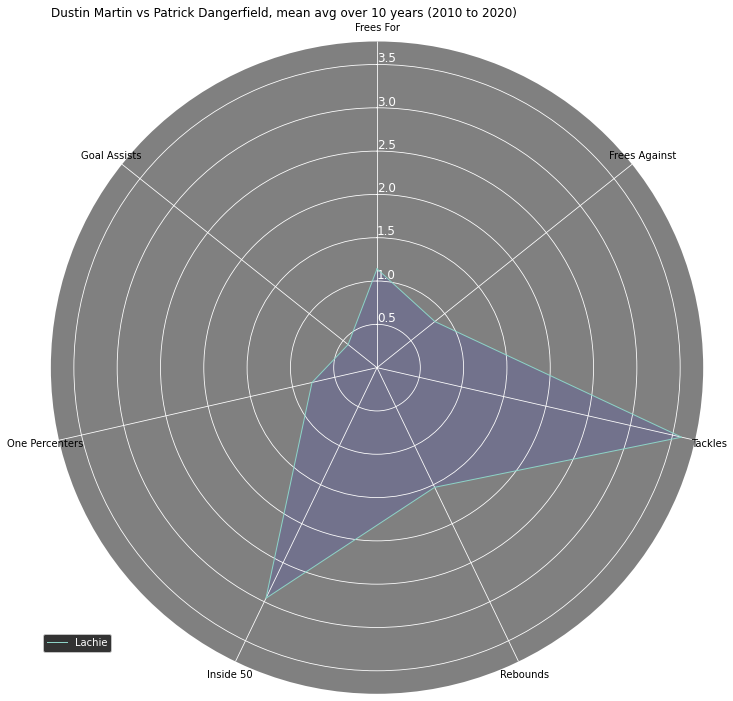

In [144]:
# ------- PART 1: Create background
fig =plt.figure(figsize=(18,12))
fig.set_facecolor("white")

# number of variable
categories=list(lachie_neale_radar_2)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color = 'Black')
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks( color='White', size=12)
#plt.ylim(0,40)


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
#values=radar_chart_2.loc[0].drop('group').values.flatten().tolist()
values=lachie_neale_radar_2.iloc[0].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Lachie")
ax.fill(angles, values, 'b', alpha=0.1)



 
# Ind2
#values=radar_chart_2.loc[1].drop('group').values.flatten().tolist()
#values_2=radar_chart_1.iloc[1].tolist()
#values_2 += values_2[:1]
#ax.plot(angles, values_2, linewidth=1, linestyle='solid', label="Danger")
#ax.fill(angles, values_2, 'r', alpha=0.1)


ax.spines["polar"].set_visible(False)
ax.set_facecolor("grey") 
ax.xaxis.grid(True,color='White')
ax.yaxis.grid(True,color='White')
ax.set_title("Dustin Martin vs Patrick Dangerfield, mean avg over 10 years (2010 to 2020)",color="Black",loc="left")

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [145]:
radar_chart_1=radar_chart_1.append(lachie_neale_radar_1)

In [146]:
radar_chart_1

,Goals,Kicks,Hand Balls,Disp,Marks
Player,,,,,
Dustin Martin,1.114754,15.741803,9.241803,24.983607,3.885246
Patrick Dangerfield,1.130081,13.341463,11.682927,25.024390,3.959350
Lachie Neale,0.522472,11.567416,15.331461,26.898876,3.955056


In [147]:
radar_chart_2=radar_chart_2.append(lachie_neale_radar_2)

In [148]:
radar_chart_2

,Frees For,Frees Against,Tackles,Rebounds,Inside 50,One Percenters,Goal Assists
Player,,,,,,,
Dustin Martin,0.897541,1.434426,2.987705,1.360656,4.762295,1.094262,0.729508
Patrick Dangerfield,1.833333,1.195122,4.004065,1.186992,5.121951,1.418699,0.662602
Lachie Neale,1.140449,0.853933,3.606742,1.533708,2.955056,0.769663,0.426966


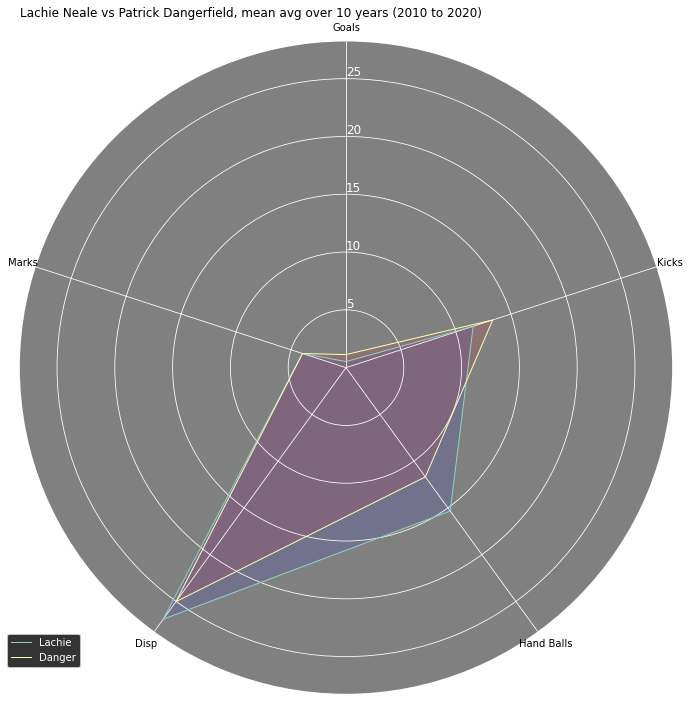

In [149]:
# ------- PART 1: Create background
fig =plt.figure(figsize=(18,12))
fig.set_facecolor("white")

# number of variable
categories=list(radar_chart_1)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color = 'Black')
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks( color='White', size=12)
#plt.ylim(0,40)


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
#values=radar_chart_2.loc[0].drop('group').values.flatten().tolist()
values=radar_chart_1.iloc[2].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Lachie")
ax.fill(angles, values, 'b', alpha=0.1)



 
# Ind2
#values=radar_chart_2.loc[1].drop('group').values.flatten().tolist()
values_2=radar_chart_1.iloc[1].tolist()
values_2 += values_2[:1]
ax.plot(angles, values_2, linewidth=1, linestyle='solid', label="Danger")
ax.fill(angles, values_2, 'r', alpha=0.1)


ax.spines["polar"].set_visible(False)
ax.set_facecolor("grey") 
ax.xaxis.grid(True,color='White')
ax.yaxis.grid(True,color='White')
ax.set_title("Lachie Neale vs Patrick Dangerfield, mean avg over 10 years (2010 to 2020)",color="Black",loc="left")

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


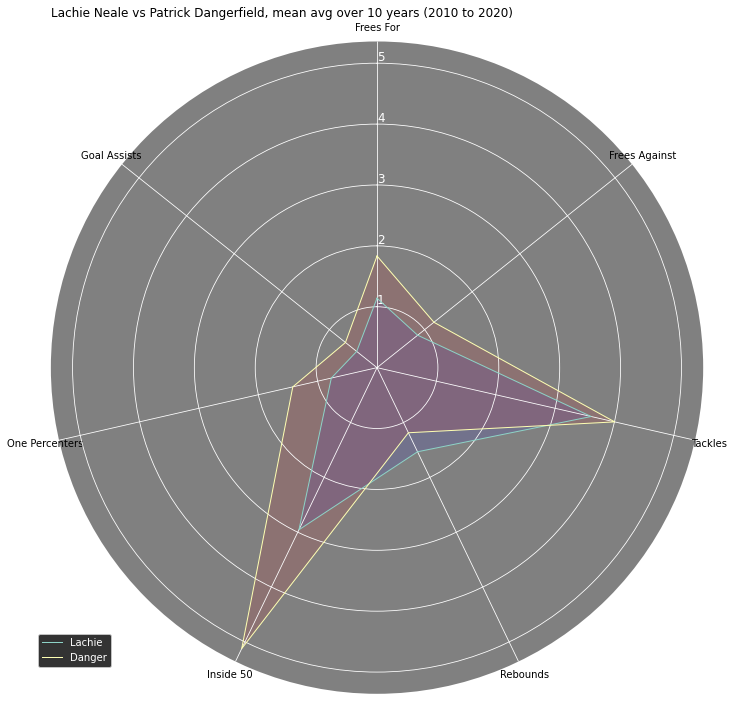

In [150]:
fig =plt.figure(figsize=(18,12))
fig.set_facecolor("white")

# number of variable
categories=list(radar_chart_2)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color = 'Black')
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks( color='White', size=12)
#plt.ylim(0,40)


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
#values=radar_chart_2.loc[0].drop('group').values.flatten().tolist()
values=radar_chart_2.iloc[2].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Lachie")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
#values=radar_chart_2.loc[1].drop('group').values.flatten().tolist()
values_2=radar_chart_2.iloc[1].tolist()
values_2 += values_2[:1]
ax.plot(angles, values_2, linewidth=1, linestyle='solid', label="Danger")
ax.fill(angles, values_2, 'r', alpha=0.1)


ax.spines["polar"].set_visible(False)
ax.set_facecolor("grey") 
ax.xaxis.grid(True,color='White')
ax.yaxis.grid(True,color='White')
ax.set_title("Lachie Neale vs Patrick Dangerfield, mean avg over 10 years (2010 to 2020)",color="Black",loc="left")

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [151]:
goals_overtime_by_team = afl_total.groupby(['Team','Year'],as_index=False)['Goals'].sum()


In [152]:
goals_overtime_by_team 

,Team,Year,Goals
0,AD,2010,250
1,AD,2011,252
2,AD,2012,388
3,AD,2013,297
4,AD,2014,315
...,...,...,...
190,WC,2016,330
191,WC,2017,309
192,WC,2018,336
193,WC,2019,309


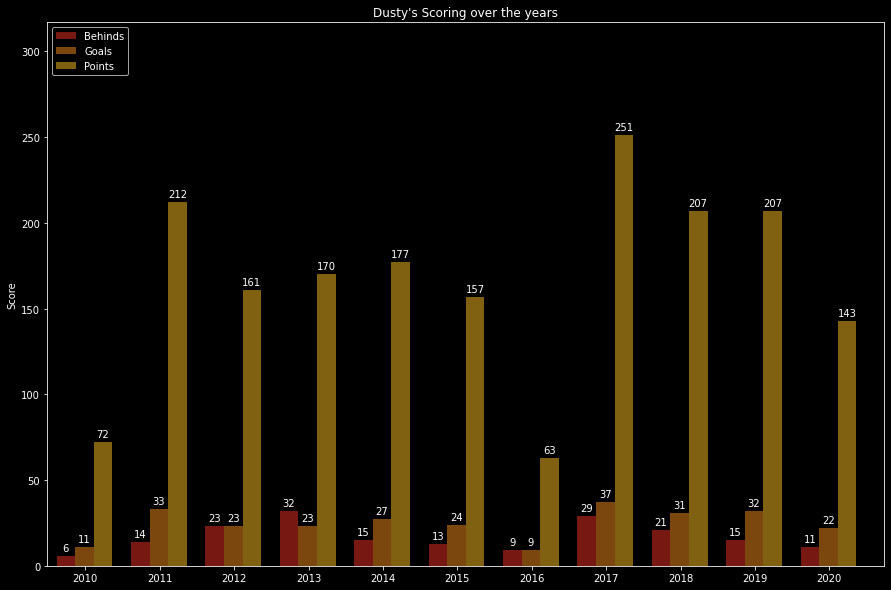

In [153]:


##### Grouped Bar Chart using Behinds, Goals and Points
dustin_martin_bar = dustin_martin_df.groupby("Year")["Behinds", "Goals", "Points"].sum()
plt.rcParams['figure.facecolor'] = 'black'
# set height of bar
points = dustin_martin_bar['Points']
goals = dustin_martin_bar['Goals']
behinds = dustin_martin_bar['Behinds']
labels = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']

x = np.arange(len(labels)) 
width = 0.25
#r2 = [r1 + width for x in r1]
#r3 = [r2 + width for x in r2]
# Set the position of the bars

fig, ax = plt.subplots(figsize=(15,10))

barlabel1= plt.bar(x,
                  behinds,
                  width,
                  alpha=0.5,
                  color='#EE3224'
                  #label=labels[0]
                  )
barlabel2= plt.bar([p+width for p in x],
                  goals,
                  width,
                  alpha = 0.5,
                  color='#F78F1E'
                  #label=labels[1]
                  )
barlabel3= plt.bar([p + width*2 for p in x],
                   points,
                   width,
                   alpha=0.5,
                   color='#FFC222'
                   #label=labels[2]
                   )

ax.set_ylabel('Score')
ax.set_title("Dusty's Scoring over the years")
ax.set_xticks([p + 1.05 * width for p in x])
ax.set_xticklabels(labels)
plt.xlim(min(x)-width, max(x)+width*4)
plt.ylim([0, max(points + goals + behinds)])
plt.legend(['Behinds', 'Goals', 'Points'], loc='upper left')
#plt.grid()
autolabel(barlabel1)
autolabel(barlabel2)
autolabel(barlabel3)

plt.show()



_**Team Analysis**_ 
Below we will start to look at certain teams, specifically: 
Brisbane Lions, 
Sydney Swans, 
Melbourne Demons and 
the Geelong Cats

In [154]:
'''First step is to extract each of the clubs data into their own dataframe'''
brisbane_lions = afl_total[afl_total['Team Name']=='Brisbane Lions']
sydney_swans = afl_total[afl_total['Team Name']=='Sydney Swans']
melb_demons = afl_total[afl_total['Team Name']=='Melbourne Demons']
gee_cats= afl_total[afl_total['Team Name']=='Geelong Cats']

For the dash boards we are going to present:
1. The number of games played over the last 10 years
2. The number of players used overs the last 10 years
3. The average goals, behinds and points.
4. Favourtie team to play.
5. Worst team to play.

More to follow.

In [155]:
brisbane_lions.groupby('Player')['Player'].count()
#afl_total.groupby(['Team','Year'],as_index=False)['Goals'].sum()

Player
Aaron Cornelius      24
Albert Proud          7
Alex Witherden       59
Allen Christensen    68
Amon Buchanan        18
                     ..
Trent West           16
Troy Selwood          5
Xavier Clarke         1
Zac Bailey           46
Zac OBrien           13
Name: Player, Length: 124, dtype: int64

Brisbane have used 124 players over the 10 years
The average is 111, with the Lions third behind Carlton with 126 players and Gold Coast on 125

In [156]:
player_count = afl_total.groupby(['Team Name','Player'],as_index=False)['Player'].count()

In [157]:
total_player_count = player_count.groupby(['Team Name'],as_index=False,sort=True)['Player'].count()

In [158]:
total_player_count.shape

(18, 2)

In [159]:
#df["weight"].mean()
total_player_count['Player'].mean()

110.94444444444444

In [160]:
total_player_count.sort_values(by=['Player'])

,Team Name,Player
16,West Coast Eagles,97
0,Adelaide Crows,102
11,North Melbourne,103
6,Geelong Cats,103
15,Sydney Swans,104
12,Port Adeliade,105
8,Greater Western Sydney,105
9,Hawthorn,108
13,Richmond,109
3,Collingwood,111


In [161]:
opponents = brisbane_lions.groupby(['Opponent Name','Year','Round'],as_index=False)['Behinds','Goals','Points'].sum()

In [162]:
opponents.head()

,Opponent Name,Year,Round,Behinds,Goals,Points
0,Adelaide Crows,2010,20,18,13,96
1,Adelaide Crows,2010,9,14,11,80
2,Adelaide Crows,2011,10,11,15,101
3,Adelaide Crows,2011,20,8,16,104
4,Adelaide Crows,2012,21,12,13,90


In [163]:
mean_points_for_df=opponents.groupby(['Opponent Name'],as_index=False)['Points'].mean()

In [164]:
mean_points_for_df

,Opponent Name,Points
0,Adelaide Crows,76.928571
1,Carlton,84.866667
2,Collingwood,74.750000
3,Essendon,79.833333
4,Freemantle,68.076923
5,Geelong Cats,69.062500
6,Gold Coast Suns,96.684211
7,Greater Western Sydney,83.363636
8,Hawthorn,77.846154
9,Melbourne,79.357143


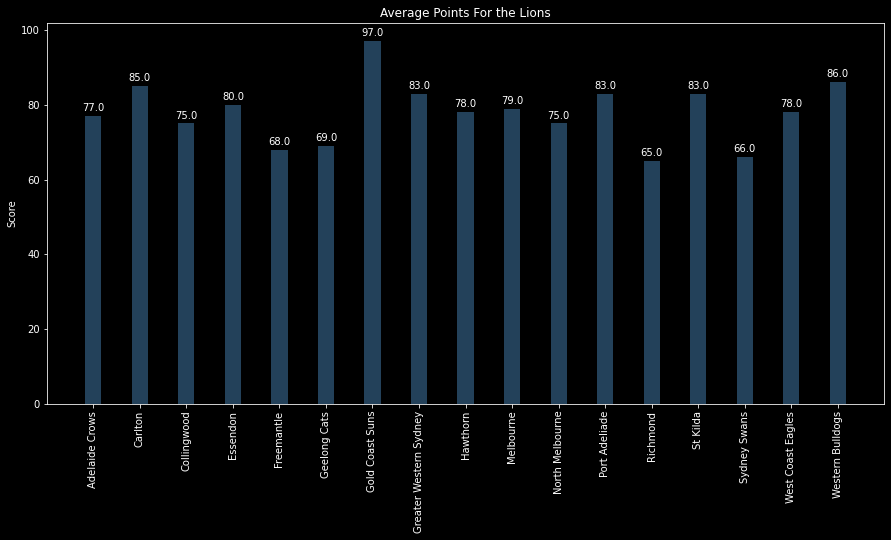

In [165]:
x = np.arange(len(mean_points_for_df['Opponent Name'])) 
width = 0.35

fig, ax = plt.subplots(figsize=(15,7))

barlabel1= plt.bar(x=mean_points_for_df['Opponent Name'],
                   height = round(mean_points_for_df['Points']),
                   width= 0.35,
                   align ='center',
                   alpha=0.5,
                   color='steelblue',
                   #tick_label = mean_df['Team Name'],
                   #orientation = 'vertical'
                  )

ax.set_ylabel('Score')
ax.set_title("Average Points For the Lions")
ax.set_xticklabels(mean_points_for_df['Opponent Name'])

autolabel(barlabel1)
plt.xticks(rotation='vertical')
plt.show()

Gold Coast Suns are the favourite team to play.

In [166]:
brisbane_lions.groupby(['Opponent','Year','Round'])['Points'].sum()

Opponent  Year  Round
AD        2010  20        96
                9         80
          2011  10       101
                20       104
          2012  21        90
                        ... 
WC        2016  13        80
          2017  19        40
          2018  23        71
          2019  1        101
          2020  3         72
Name: Points, Length: 241, dtype: int64

In [167]:
teams_against = afl_total[afl_total['Opponent']=='BL']

In [168]:
teams_points_againstdf = teams_against.groupby(['Team Name','Year','Round'],as_index=False)['Behinds','Goals','Points'].sum()

In [169]:
teams_points_againstdf.head()

,Team Name,Year,Round,Behinds,Goals,Points
0,Adelaide Crows,2010,20,12,15,102
1,Adelaide Crows,2010,9,12,13,90
2,Adelaide Crows,2011,10,13,8,61
3,Adelaide Crows,2011,20,11,16,107
4,Adelaide Crows,2012,21,12,12,84


In [170]:
mean_pointsagainst_df = teams_points_againstdf.groupby(['Team Name'],as_index=False)['Points'].mean()


In [171]:
mean_pointsagainst_df 

,Team Name,Points
0,Adelaide Crows,103.285714
1,Carlton,90.800000
2,Collingwood,96.583333
3,Essendon,89.250000
4,Freemantle,86.769231
5,Geelong Cats,111.375000
6,Gold Coast Suns,80.736842
7,Greater Western Sydney,91.454545
8,Hawthorn,103.923077
9,Melbourne,79.071429


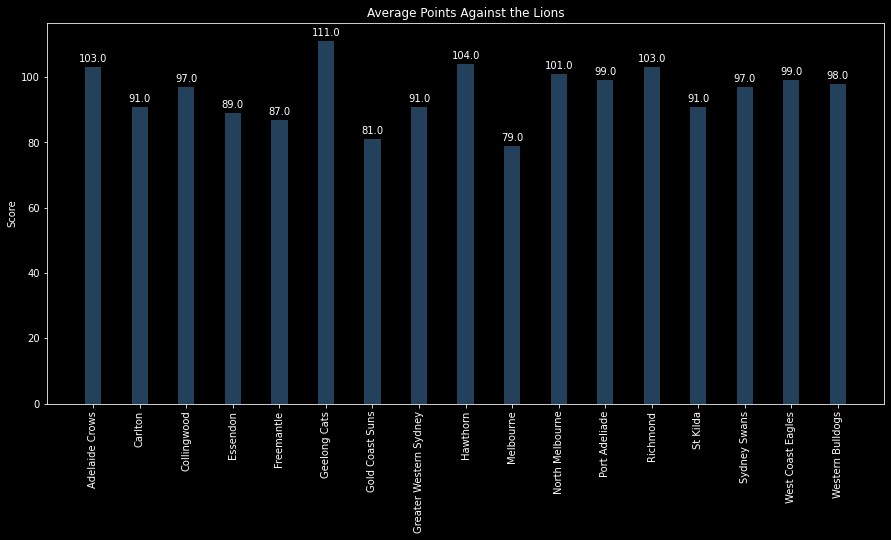

In [172]:
x = np.arange(len(mean_pointsagainst_df['Team Name'])) 
width = 0.35

fig, ax = plt.subplots(figsize=(15,7))

barlabel1= plt.bar(x=mean_pointsagainst_df['Team Name'],
                   height = round(mean_pointsagainst_df['Points']),
                   width= 0.35,
                   align ='center',
                   alpha=0.5,
                   color='steelblue',
                   #tick_label = mean_df['Team Name'],
                   #orientation = 'vertical'
                  )

ax.set_ylabel('Score')
ax.set_title("Average Points Against the Lions")
ax.set_xticklabels(mean_pointsagainst_df ['Team Name'])

autolabel(barlabel1)
plt.xticks(rotation='vertical')
plt.show()

Now that we have the the points for and points against we can do grouped bar chart as completed above to allow for easier comparison.
We can also look to the two points dataframes, for and against to recreate the results for each of the lions games

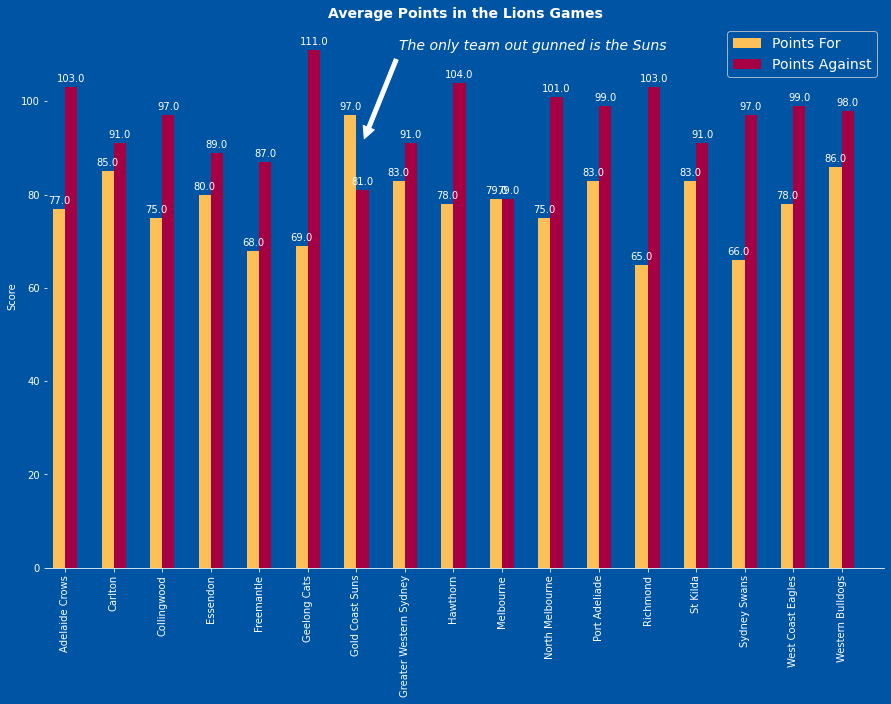

In [173]:
#### Brisbane Lions colours are blue, gold and maroon or burgundy
##### Grouped Bar Chart to show the average points and against the Lions
##### The two data frames are mean_pointsagainst_df and mean_points_for_df
plt.rcParams['figure.facecolor'] = '#0054A4'
# set height of bar
pointsfor = mean_points_for_df['Points']
pointsagainst = mean_pointsagainst_df['Points']
#behinds = dustin_martin_bar['Behinds']
labels = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']

x = np.arange(len(mean_pointsagainst_df['Team Name'])) 
width = 0.25


fig, ax = plt.subplots(figsize=(15,10))

barlabel1= plt.bar(x,
                  round(pointsfor,0),
                  width,
                  alpha=1,
                  color='#FDBF57',
                  label=labels[0])
barlabel2= plt.bar([p+width for p in x],
                  round(pointsagainst,0),
                  width,
                  alpha = 1,
                  color='#A50044',
                  label=labels[1])

ax.set_facecolor('#0054A4')
ax.set_ylabel('Score')
ax.set_title("Average Points in the Lions Games",fontsize=14,fontweight='bold')
ax.set_xticks([p +0.5 * width for p in x])
ax.set_xticklabels(mean_pointsagainst_df['Team Name'])
plt.xlim(min(x)-width, max(x)+width*4)
ax.annotate(text='The only team out gunned is the Suns',xy=(6.25,91.0),xytext=(7.0,111.0),
            style='italic', fontsize=14, 
            arrowprops=dict(facecolor='white', shrink=0.05)
            )

#plt.ylim([0, max(points + goals + behinds)])
right_side = ax.spines["right"]
right_side.set_visible(False)
left_side = ax.spines["left"]
left_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
plt.legend(['Points For', 'Points Against'], loc='upper right', facecolor='#0054A4',fontsize=14)
autolabel(barlabel1)
autolabel(barlabel2)
#autolabel(barlabel3)
plt.xticks(rotation='vertical')
plt.show()

Now we are going to identify each of the graphs to include in our dashboard. 

- 1) Number of games won and lost
- 2) Number of points for and against 
- 3) Number of players used per season 
- 4) Kicks, hand balls, marks and disposals
- 5) Rebounds, Inside 50s, One Percenters, Marks Inside 50s

In [174]:
# Number of Games won and lost over the 10 years.abs

teams_points_againstdf.tail()

,Team Name,Year,Round,Behinds,Goals,Points
236,Western Bulldogs,2017,5,18,17,120
237,Western Bulldogs,2018,8,10,16,106
238,Western Bulldogs,2019,20,12,11,78
239,Western Bulldogs,2019,8,12,13,90
240,Western Bulldogs,2020,11,4,11,70


In [175]:
opponents.tail()

,Opponent Name,Year,Round,Behinds,Goals,Points
236,Western Bulldogs,2017,5,5,14,89
237,Western Bulldogs,2018,8,7,14,91
238,Western Bulldogs,2019,20,9,14,93
239,Western Bulldogs,2019,8,7,11,73
240,Western Bulldogs,2020,11,8,14,92


In [177]:
opponents.rename(columns={'Behinds': 'Behinds for', 'Goals': 'Goals for','Points':'Points for'})

,Opponent Name,Year,Round,BL Behinds,BL Goals,BL Points
0,Adelaide Crows,2010,20,18,13,96
1,Adelaide Crows,2010,9,14,11,80
2,Adelaide Crows,2011,10,11,15,101
3,Adelaide Crows,2011,20,8,16,104
4,Adelaide Crows,2012,21,12,13,90
...,...,...,...,...,...,...
236,Western Bulldogs,2017,5,5,14,89
237,Western Bulldogs,2018,8,7,14,91
238,Western Bulldogs,2019,20,9,14,93
239,Western Bulldogs,2019,8,7,11,73


In [178]:
teams_points_againstdf.rename(columns={'Behinds':'Behinds against','Goals':'Goals against','Points':'Points against'})

,Team Name,Year,Round,Behinds against,Goals against,Points against
0,Adelaide Crows,2010,20,12,15,102
1,Adelaide Crows,2010,9,12,13,90
2,Adelaide Crows,2011,10,13,8,61
3,Adelaide Crows,2011,20,11,16,107
4,Adelaide Crows,2012,21,12,12,84
...,...,...,...,...,...,...
236,Western Bulldogs,2017,5,18,17,120
237,Western Bulldogs,2018,8,10,16,106
238,Western Bulldogs,2019,20,12,11,78
239,Western Bulldogs,2019,8,12,13,90


In [186]:
bl_matches=pd.DataFrame()

bl_matches=opponents.join(teams_points_againstdf, lsuffix='_for', rsuffix='_against')


In [187]:
bl_matches.drop(['Year_against', 'Round_against','Team Name'], axis=1)

,Opponent Name,Year_for,Round_for,Behinds_for,Goals_for,Points_for,Behinds_against,Goals_against,Points_against
0,Adelaide Crows,2010,20,18,13,96,12,15,102
1,Adelaide Crows,2010,9,14,11,80,12,13,90
2,Adelaide Crows,2011,10,11,15,101,13,8,61
3,Adelaide Crows,2011,20,8,16,104,11,16,107
4,Adelaide Crows,2012,21,12,13,90,12,12,84
...,...,...,...,...,...,...,...,...,...
236,Western Bulldogs,2017,5,5,14,89,18,17,120
237,Western Bulldogs,2018,8,7,14,91,10,16,106
238,Western Bulldogs,2019,20,9,14,93,12,11,78
239,Western Bulldogs,2019,8,7,11,73,12,13,90


In [190]:
bl_matches.rename(columns={'Year_for':'Year','Round_for':'Round'})

,Opponent Name,Year,Round,Behinds_for,Goals_for,Points_for,Team Name,Year_against,Round_against,Behinds_against,Goals_against,Points_against
0,Adelaide Crows,2010,20,18,13,96,Adelaide Crows,2010,20,12,15,102
1,Adelaide Crows,2010,9,14,11,80,Adelaide Crows,2010,9,12,13,90
2,Adelaide Crows,2011,10,11,15,101,Adelaide Crows,2011,10,13,8,61
3,Adelaide Crows,2011,20,8,16,104,Adelaide Crows,2011,20,11,16,107
4,Adelaide Crows,2012,21,12,13,90,Adelaide Crows,2012,21,12,12,84
...,...,...,...,...,...,...,...,...,...,...,...,...
236,Western Bulldogs,2017,5,5,14,89,Western Bulldogs,2017,5,18,17,120
237,Western Bulldogs,2018,8,7,14,91,Western Bulldogs,2018,8,10,16,106
238,Western Bulldogs,2019,20,9,14,93,Western Bulldogs,2019,20,12,11,78
239,Western Bulldogs,2019,8,7,11,73,Western Bulldogs,2019,8,12,13,90


In [191]:
bl_matches.drop(['Year_against', 'Round_against','Team Name'], axis=1,inplace=True)

In [192]:
bl_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 240
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Opponent Name    241 non-null    object
 1   Year_for         241 non-null    int64 
 2   Round_for        241 non-null    object
 3   Behinds_for      241 non-null    int64 
 4   Goals_for        241 non-null    int64 
 5   Points_for       241 non-null    int64 
 6   Behinds_against  241 non-null    int64 
 7   Goals_against    241 non-null    int64 
 8   Points_against   241 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 28.8+ KB


In [195]:
bl_matches.rename(columns={'Year_for':'Year','Round_for':'Round'},inplace=True)

In [196]:
bl_matches.head()

,Opponent Name,Year,Round,Behinds_for,Goals_for,Points_for,Behinds_against,Goals_against,Points_against
0,Adelaide Crows,2010,20,18,13,96,12,15,102
1,Adelaide Crows,2010,9,14,11,80,12,13,90
2,Adelaide Crows,2011,10,11,15,101,13,8,61
3,Adelaide Crows,2011,20,8,16,104,11,16,107
4,Adelaide Crows,2012,21,12,13,90,12,12,84


In [197]:
bl_matches.loc[bl_matches['Points_for']>bl_matches['Points_against'],"Result"]="W"
bl_matches.loc[bl_matches['Points_for']<bl_matches['Points_against'],"Result"]="L"
bl_matches.loc[bl_matches['Points_for']==bl_matches['Points_against'],"Result"]="D"



In [198]:
bl_matches.head()

,Opponent Name,Year,Round,Behinds_for,Goals_for,Points_for,Behinds_against,Goals_against,Points_against,Result
0,Adelaide Crows,2010,20,18,13,96,12,15,102,L
1,Adelaide Crows,2010,9,14,11,80,12,13,90,L
2,Adelaide Crows,2011,10,11,15,101,13,8,61,W
3,Adelaide Crows,2011,20,8,16,104,11,16,107,L
4,Adelaide Crows,2012,21,12,13,90,12,12,84,W


In [245]:
line_chart=bl_matches.groupby(['Year','Result']).count().reset_index()

#teams_points_againstdf = teams_against.groupby(['Team Name','Year','Round'],as_index=False)['Behinds','Goals','Points'].sum()

In [246]:
line_chart.rename(columns={'Opponent Name':'Count'},inplace=True)

In [247]:
line_chart.drop(['Round','Behinds_for','Goals_for','Points_for','Behinds_against','Goals_against','Points_against'],axis=1,inplace=True)

In [248]:
line_chart

,Year,Result,Count
0,2010,L,15
1,2010,W,7
2,2011,L,17
3,2011,W,5
4,2012,L,12
5,2012,W,10
6,2013,L,12
7,2013,W,10
8,2014,D,1
9,2014,L,16
